In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist #28x28 images of handwritten digits from 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#buiild the model
 
model = tf.keras.models.Sequential()
#first layer is the input layer
model.add(tf.keras.layers.Flatten())
#2 hidden layers
#we will use 128 units or 128 neurons
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.softmax))
#we just added 3 layers

#we need to define parameters for the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
#we can use binary sparse entropy in case of dogs and cats
model.fit(x_train,y_train, epochs = 3)
#Sequential is the most common model

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3223 - accuracy: 0.9092
Epoch 2/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1178 - accuracy: 0.9647
Epoch 3/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0810 - accuracy: 0.9744


In [4]:
val_loss , val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09964604465989396 0.968


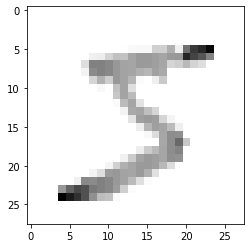

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
#we can set the color of or image as bianry for black and white only 2 values 0 or 1
plt.show()
print(x_train[0])

In [7]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [8]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [9]:
predictions = new_model.predict([x_test])

In [10]:
print(predictions)

[[7.1120809e-08 1.9512606e-07 8.7541684e-06 ... 3.6566285e-13
  6.7862740e-13 8.3982029e-13]
 [1.4581709e-08 7.0747563e-05 9.9992859e-01 ... 1.9402719e-14
  1.9816437e-15 1.1734806e-15]
 [7.4509609e-07 9.9977785e-01 5.8324108e-06 ... 6.7010859e-09
  9.0387866e-09 4.6480322e-09]
 ...
 [4.7307789e-09 7.9333307e-07 4.1572594e-08 ... 6.9260493e-11
  7.7810647e-11 2.0697606e-10]
 [4.5873162e-07 4.2623324e-05 3.2466090e-07 ... 1.5756979e-11
  3.1836891e-11 4.6515656e-12]
 [2.4948340e-06 1.9103297e-07 4.0123365e-07 ... 9.6705959e-12
  2.7079816e-12 2.8031058e-13]]


In [11]:
import numpy as np

In [15]:
print(np.argmax(predictions[2]))

1


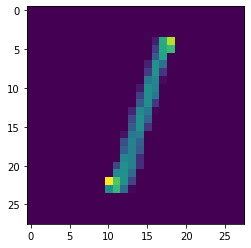

In [16]:
plt.imshow(x_test[2])
plt.show()